## Exercise 1 - Bayes classification system

In [90]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [91]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [92]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [93]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [94]:
# TODO: Compute the priors
p_c0 = (y_train == 0).sum() / y_train.size
p_c1 = 1 - p_c0

c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

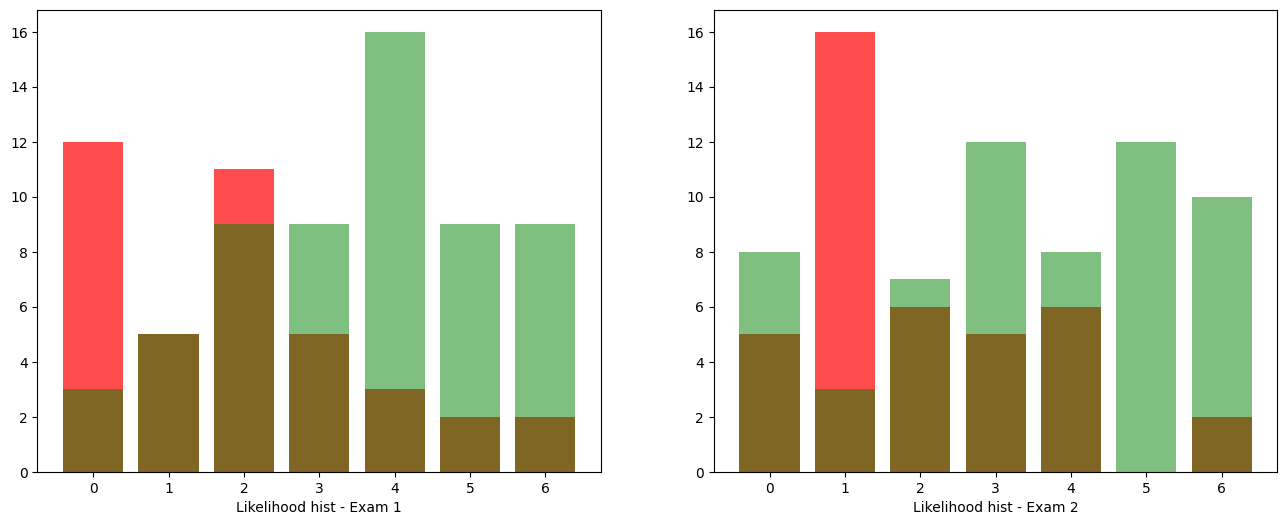

In [95]:
# TODO: Compute histograms

hist_x1_p_c0 = np.histogram(X_train[["x1"]].to_numpy()[y_train == 0], bins="auto")
hist_x2_p_c0 = np.histogram(X_train[["x2"]].to_numpy()[y_train == 0], bins="auto")
hist_x1_p_c1 = np.histogram(X_train[["x1"]].to_numpy()[y_train == 1], bins="auto")
hist_x2_p_c1 = np.histogram(X_train[["x2"]].to_numpy()[y_train == 1], bins="auto")


histograms = []
histograms.append(hist_x1_p_c0)
histograms.append(hist_x2_p_c0)
histograms.append(hist_x1_p_c1)
histograms.append(hist_x2_p_c1)

# TODO: plot histograms

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.bar(range(len(hist_x1_p_c0[0])), hist_x1_p_c0[0], color="red", alpha=0.7, label="c0")
plt.bar(range(len(hist_x1_p_c1[0])), hist_x1_p_c1[0], color="green", alpha=0.5, label="c1")
plt.xlabel('Likelihood hist - Exam 1')

plt.subplot(1, 2, 2)
plt.bar(range(len(hist_x2_p_c0[0])), hist_x2_p_c0[0], color="red", alpha=0.7, label="c0")
plt.bar(range(len(hist_x2_p_c1[0])), hist_x2_p_c1[0], color="green", alpha=0.5, label="c1")
plt.xlabel('Likelihood hist - Exam 2')

plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [96]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs
    index = np.abs(bin_edges - x).argmin()
    if x <= bin_edges[index] or index >= len(hist_values) -1:
        index -= 1
        #print(str(hist_values))
        #print(str(bin_edges))
        #print(str(x) + " : " + str(index))# + " -> " + str(hist_values[index]))
    return hist_values[index] / np.sum(hist_values)

# la probabilite qu'on echoue (y=0) lorsque notre note du premier exam est x (donc x1=x) 
#x = 82.5
#value = likelihood_hist(x, hist_x1_p_c1[0], hist_x1_p_c1[1])
#print(value)

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [97]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [98]:
# TODO: predict on test set in the 3 cases described above

y_pred = []

for x in X_test[["x1"]].to_numpy() :
    p_x1_c0 = likelihood_hist(x, hist_x1_p_c0[0], hist_x1_p_c0[1])
    p_x1_c0_post = p_x1_c0 * p_c0
    p_x1_c1 = likelihood_hist(x, hist_x1_p_c1[0], hist_x1_p_c1[1])
    p_x1_c1_post = p_x1_c1 * p_c1
    y_pred.append(1 if p_x1_c1_post >= p_x1_c0_post else 0)

accuracy_score(y_test, y_pred)

0.66

In [99]:
y_pred = []

for x in X_test[["x2"]].to_numpy() :
    p_x2_c0 = likelihood_hist(x, hist_x2_p_c0[0], hist_x2_p_c0[1])
    p_x2_c0_post = p_x2_c0 * p_c0
    p_x2_c1 = likelihood_hist(x, hist_x2_p_c1[0], hist_x2_p_c1[1])
    p_x2_c1_post = p_x2_c1 * p_c1
    y_pred.append(1 if p_x2_c1_post >= p_x2_c0_post else 0)

accuracy_score(y_test, y_pred)

0.61

In [100]:
y_pred = []
for x in X_test.to_numpy() :
    #Compute probability on X1
    p_x1_c0 = likelihood_hist(x[0], hist_x1_p_c0[0], hist_x1_p_c0[1])
    p_x1_c0_post = p_x1_c0 * p_c0
    p_x1_c1 = likelihood_hist(x[0], hist_x1_p_c1[0], hist_x1_p_c1[1])
    p_x1_c1_post = p_x1_c1 * p_c1

    #Compute probability on X2
    p_x2_c0 = likelihood_hist(x[1], hist_x2_p_c0[0], hist_x2_p_c0[1])
    p_x2_c0_post = p_x2_c0 * p_c0
    p_x2_c1 = likelihood_hist(x[1], hist_x2_p_c1[0], hist_x2_p_c1[1])
    p_x2_c1_post = p_x2_c1 * p_c1
    
    p_x_c0_post = p_x1_c0_post * p_x2_c0_post
    p_x_c1_post = p_x1_c1_post * p_x2_c1_post
    y_pred.append(1 if p_x_c1_post >= p_x_c0_post else 0)

accuracy_score(y_test, y_pred)

0.64

Which system is the best ?

The best system is using only feature X1 where we achieve an accuracy of 0.66.

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [101]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

In [102]:
# TODO: Compute mean and variance for each classes and each features (8 values)
x1_c0_train = X_train[["x1"]].to_numpy()[y_train == 0]
x1_c1_train = X_train[["x1"]].to_numpy()[y_train == 1]

x2_c0_train = X_train[["x2"]].to_numpy()[y_train == 0]
x2_c1_train = X_train[["x2"]].to_numpy()[y_train == 1]

x1_c0_mean = np.mean(x1_c0_train)
x1_c1_mean = np.mean(x1_c1_train)
x2_c0_mean = np.mean(x2_c0_train)
x2_c1_mean = np.mean(x2_c1_train)

x1_c0_var = np.var(x1_c0_train)
x1_c1_var = np.var(x1_c1_train)
x2_c0_var = np.var(x2_c0_train)
x2_c1_var = np.var(x2_c1_train)


In [109]:
# TODO: predict on test set in the 3 cases

y_pred = []

for x in X_test[["x1"]].to_numpy() :
    p_x1_c0 = likelihood_univariate_gaussian(x, x1_c0_mean, x1_c0_var)
    p_x1_c0_post = p_x1_c0 * p_c0
    p_x1_c1 = likelihood_univariate_gaussian(x, x1_c1_mean, x1_c1_var)
    p_x1_c1_post = p_x1_c1 * p_c1
    y_pred.append(1 if p_x1_c1_post >= p_x1_c0_post else 0)

accuracy_score(y_test, y_pred)

0.71

In [104]:
y_pred = []

for x in X_test[["x2"]].to_numpy() :
    p_x2_c0 = likelihood_univariate_gaussian(x, x2_c0_mean, x1_c0_var)
    p_x2_c0_post = p_x2_c0 * p_c0
    p_x2_c1 = likelihood_univariate_gaussian(x, x2_c1_mean, x2_c1_var)
    p_x2_c1_post = p_x2_c1 * p_c1
    y_pred.append(1 if p_x2_c1_post >= p_x2_c0_post else 0)

accuracy_score(y_test, y_pred)

0.73

In [111]:
y_pred = []
for x in X_test.to_numpy() :
    #Compute probability on X1
    p_x1_c0 = likelihood_univariate_gaussian(x[0], x1_c0_mean, x1_c0_var)
    p_x1_c0_post = p_x1_c0 * p_c0
    p_x1_c1 = likelihood_univariate_gaussian(x[0], x1_c1_mean, x1_c1_var)
    p_x1_c1_post = p_x1_c1 * p_c1

    #Compute probability on X2
    p_x2_c0 = likelihood_univariate_gaussian(x[1], x2_c0_mean, x1_c0_var)
    p_x2_c0_post = p_x2_c0 * p_c0
    p_x2_c1 = likelihood_univariate_gaussian(x[1], x2_c1_mean, x2_c1_var)
    p_x2_c1_post = p_x2_c1 * p_c1
    
    p_x_c0_post = p_x1_c0_post * p_x2_c0_post
    p_x_c1_post = p_x1_c1_post * p_x2_c1_post
  
    y_pred.append(1 if p_x_c1_post >= p_x_c0_post else 0)

accuracy_score(y_test, y_pred)

0.92